In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime 

In [35]:
def fetch_stock_data(ticker, interval="1h", period="730d"):
    """
    Fetch stock data from Yahoo Finance.

    Args:
        ticker (str): Stock symbol (e.g., "AAPL").
        interval (str): Interval e.g., "1m", "1h", "1d".
        period (str): Duration of historical data, keep in mind the day limits for each interval.

    Returns:
        pd.DataFrame: Stock data with Date, Open, High, Low, Close, Volume.
    """
    stock = yf.Ticker(ticker)
    data = stock.history(period=period, interval=interval)

    # Reset index to get Date as a column
    data.reset_index(inplace=True)

    # Select relevant columns
    data = data[["Datetime", "Open", "High", "Low", "Close", "Volume"]]
    data.rename(columns={"Datetime": "Date"}, inplace=True)

    return data

# Usage
stock_symbol = "AAPL"
data = fetch_stock_data(stock_symbol)

data

,Date,Open,High,Low,Close,Volume
0,2022-03-18 09:30:00-04:00,160.509995,161.919998,159.759995,161.395004,31435630
1,2022-03-18 10:30:00-04:00,161.389999,162.190002,160.820007,161.789993,10494244
2,2022-03-18 11:30:00-04:00,161.779999,162.610001,161.779999,162.580002,9003024
3,2022-03-18 12:30:00-04:00,162.585007,162.899994,162.360001,162.630005,9421564
4,2022-03-18 13:30:00-04:00,162.619995,163.054993,162.244995,162.960007,7858878
...,...,...,...,...,...,...
5076,2025-02-12 13:30:00-05:00,235.473206,236.419998,235.320007,236.210007,3035921
5077,2025-02-12 14:30:00-05:00,236.210007,236.660004,236.070007,236.464996,3343068
5078,2025-02-12 15:30:00-05:00,236.460007,236.960007,235.910004,236.889999,4358973
5079,2025-02-13 09:30:00-05:00,238.419998,239.000000,235.570007,237.880005,9840230


In [ ]:
os.makedirs("../data", exist_ok=True)
data.to_csv(f"../data/{stock_symbol}_1h_data_{datetime.datetime.now()}.csv", index=False)

print(f"✅ Data saved for {stock_symbol}!")

✅ Data saved for AAPL!


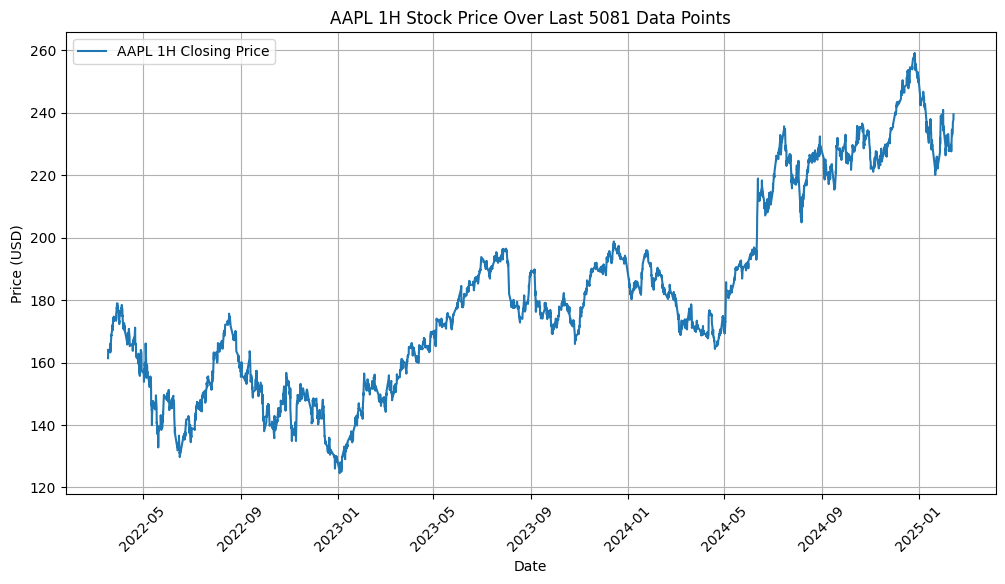

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Close"], label=f"{stock_symbol} 1H Closing Price")
plt.title(f"{stock_symbol} 1H Stock Price Over Last {data.shape[0]} Data Points")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
